# Flipkart web scraper

This is Flipkart Product Web Scraper build using scrapy module of python

## Features

It extracts the following:

### - Product Name

### - Product Stars

### - Product Ratings & Reviews

### - Product MRP

### - Product Current Price

### - Product ImageURL

In [34]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen
import matplotlib.pyplot as plt

In [2]:
# reading your url

http = urlopen("https://www.flipkart.com/search?q=laptop%2050000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=")
webdata = http.read()
print(webdata)

soup1 = soup(webdata)

b'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.4fb0ab.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.

In [3]:
http = urlopen("https://www.flipkart.com/search?q=laptop%2050000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3")
webdata2 = http.read()
print(webdata2)

soup2 = soup(webdata2)

b'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.4fb0ab.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.

In [4]:
complete_data = webdata + webdata2

complete_data

b'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.4fb0ab.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.

In [5]:
pages_link = soup1.findAll('a',{'class':'ge-49M'})
domain = 'https://www.flipkart.com/search?q=laptop+50000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page='

for i in range(2,41):
    link = domain+str(i)
    page_data = urlopen(link)
    webdata1 = page_data.read()
    webdata += webdata1
    

In [6]:
soupdata = soup(webdata, 'html.parser')
type(soupdata)

bs4.BeautifulSoup

In [7]:
containers = soupdata.findAll('div',{'class': '_2kHMtA'})
print(type(containers),len(containers))

<class 'bs4.element.ResultSet'> 936


In [8]:
containers[0]   #data in first container

<div class="_2kHMtA"><a class="_1fQZEK" href="/asus-vivobook-15-core-i3-11th-gen-8-gb-512-gb-ssd-windows-11-home-x515ea-ej322ws-thin-light-laptop/p/itmc6461360364e0?pid=COMGA5TUCZAV4HGH&amp;lid=LSTCOMGA5TUCZAV4HGHWM8PS0&amp;marketplace=FLIPKART&amp;q=laptop+50000&amp;store=6bo%2Fb5g&amp;spotlightTagId=BestsellerId_6bo%2Fb5g&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=9c51c26f-1222-48a6-b8a9-3aa5496ffab6.COMGA5TUCZAV4HGH.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=3i9edzn6lc0000001683703614526&amp;qH=348e3fb268e48d7e" rel="noopener noreferrer" target="_blank"><div></div><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515EA-EJ322WS Thin and Light La..." class="_396cs4" loading="eager" src="https://rukminim1.flixcart.com/image/312/312/xif0q/computer/o/t/h/-original-imagg6t9pauha4t7.jpeg?q=70"/></div></div></div><div class="_3w

In [9]:
containers[960]

IndexError: list index out of range

In [29]:
for container in containers:
    product = container.findAll("div",{"class":"_4rR01T"})
    print(product[0].text)
    

ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515EA-EJ322WS Thin and Light La...
ASUS Vivobook 15 Core i5 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515EA-EJ522WS Thin and Light La...
HP 15s Intel Core i5 12th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq5111TU Thin and Light Laptop
HP Victus Ryzen 5 Hexa Core 5600H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce GTX ...
realme Book (Slim) Core i3 11th Gen - (8 GB/256 GB SSD/Windows 10 Home) RMNB1001 Thin and Light Laptop
HP 14s Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 14s - dy2508TU Thin and Light Laptop
HP Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 15s- eq2144au Thin and Light Laptop
HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop
Lenovo IdeaPad Gaming 3 Ryzen 5 Hexa Core 5600H - (8 GB/1 TB HDD/256 GB SSD/Windows 11 Home/4 GB Graph...
Lenovo Ryzen 3 Hexa Core 5300U - (8 GB/512 GB SSD/Windows 11 Home) 

In [28]:
for container in containers:
    product = container.findAll("div",{"class":"_4rR01T"})
    print(type(product[0].text))
    

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [27]:
for container in containers:
    product = container.findAll("div",{"class":"_4rR01T"})
    print(product[0].text.split('-')[0])
    

ASUS Vivobook 15 Core i3 11th Gen 
ASUS Vivobook 15 Core i5 11th Gen 
HP 15s Intel Core i5 12th Gen 
HP Victus Ryzen 5 Hexa Core 5600H 
realme Book (Slim) Core i3 11th Gen 
HP 14s Intel Core i3 11th Gen 
HP Ryzen 5 Hexa Core 5500U 
HP 14s Intel Core i3 11th Gen 
Lenovo IdeaPad Gaming 3 Ryzen 5 Hexa Core 5600H 
Lenovo Ryzen 3 Hexa Core 5300U 
ASUS VivoBook 14 (2021) Celeron Dual Core 
HP Victus Core i5 12th Gen 
Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U 
HP Ryzen 5 Hexa Core 5500U 
HP Pavilion (2023) Eyesafe Ryzen 5 Hexa Core 5625U 
HP 15s Intel Core i3 12th Gen 
MSI Bravo 15 Ryzen 5 Hexa Core AMD R5
HP Pavilion Ryzen 5 Hexa Core 5625U 
HP Intel Core i5 11th Gen 
HP Core i3 12th Gen 
ASUS TUF Gaming F15 Core i5 10th Gen 
HP Pavilion Intel Core i5 12th Gen 
MSI Core i3 11th Gen 
Primebook 4G Android Based MediaTek MT8788 
Lenovo IdeaPad Ryzen 5 Hexa Core 5600H 
RedmiBook Pro Core i5 11th Gen 
ASUS Vivobook K15 OLED Ryzen 5 Hexa Core AMD R5
HP 14s Intel Core i3 11th Gen 
HP 15s Intel Core 

In [26]:
for container in containers:
    product = container.find("div",{"class":"_4rR01T"})
    print(product.text.split('-')[0].strip())
    

ASUS Vivobook 15 Core i3 11th Gen
ASUS Vivobook 15 Core i5 11th Gen
HP 15s Intel Core i5 12th Gen
HP Victus Ryzen 5 Hexa Core 5600H
realme Book (Slim) Core i3 11th Gen
HP 14s Intel Core i3 11th Gen
HP Ryzen 5 Hexa Core 5500U
HP 14s Intel Core i3 11th Gen
Lenovo IdeaPad Gaming 3 Ryzen 5 Hexa Core 5600H
Lenovo Ryzen 3 Hexa Core 5300U
ASUS VivoBook 14 (2021) Celeron Dual Core
HP Victus Core i5 12th Gen
Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U
HP Ryzen 5 Hexa Core 5500U
HP Pavilion (2023) Eyesafe Ryzen 5 Hexa Core 5625U
HP 15s Intel Core i3 12th Gen
MSI Bravo 15 Ryzen 5 Hexa Core AMD R5
HP Pavilion Ryzen 5 Hexa Core 5625U
HP Intel Core i5 11th Gen
HP Core i3 12th Gen
ASUS TUF Gaming F15 Core i5 10th Gen
HP Pavilion Intel Core i5 12th Gen
MSI Core i3 11th Gen
Primebook 4G Android Based MediaTek MT8788
Lenovo IdeaPad Ryzen 5 Hexa Core 5600H
RedmiBook Pro Core i5 11th Gen
ASUS Vivobook K15 OLED Ryzen 5 Hexa Core AMD R5
HP 14s Intel Core i3 11th Gen
HP 15s Intel Core i3 11th Gen
Lenovo IdeaPad

In [17]:
for container in containers:
    #product = container.find("div",{"class":"_4rR01T"})
    #ProductName = product.text.split('-')[0].strip()
    
 #   stars = container.find('div',{'class':'_3LWZlK'})
 #   try:
  #      print(stars.text)
  #  except:
  #        print(stars)
            
    Rating = container.find('span',{'class':'_2_R_DZ'})
    try:
        print(Rating.text)
    except:
        print(Rating)

1,242 Ratings & 116 Reviews
555 Ratings & 47 Reviews
2,741 Ratings & 209 Reviews
92 Ratings & 8 Reviews
13,130 Ratings & 1,917 Reviews
4,196 Ratings & 366 Reviews
1,525 Ratings & 116 Reviews
2,427 Ratings & 212 Reviews
11 Ratings & 1 Reviews
60 Ratings & 13 Reviews
1,705 Ratings & 202 Reviews
661 Ratings & 50 Reviews
1,822 Ratings & 195 Reviews
2,223 Ratings & 220 Reviews
280 Ratings & 29 Reviews
400 Ratings & 50 Reviews
2,715 Ratings & 358 Reviews
271 Ratings & 35 Reviews
353 Ratings & 22 Reviews
None
5,248 Ratings & 570 Reviews
485 Ratings & 42 Reviews
40 Ratings & 9 Reviews
411 Ratings & 164 Reviews
121 Ratings & 10 Reviews
5,268 Ratings & 601 Reviews
971 Ratings & 98 Reviews
2,427 Ratings & 212 Reviews
579 Ratings & 54 Reviews
673 Ratings & 64 Reviews
367 Ratings & 36 Reviews
661 Ratings & 50 Reviews
136 Ratings & 17 Reviews
220 Ratings & 19 Reviews
63 Ratings & 3 Reviews
400 Ratings & 50 Reviews
91 Ratings & 9 Reviews
110 Ratings & 14 Reviews
79 Ratings & 5 Reviews
None
3,523 Rati

In [16]:
import re

ratRev = re.findall('\d+,?\d*','1,440 Ratings & 127 Reviews')
print(ratRev[0], ratRev[1])

1,440 127


In [ ]:
for container in containers:
    
    Rating = container.find('span',{'class':'_2_R_DZ'})
    try:
        ratRev = re.findall('\d+,?\d*', Rating.text)
        Ratings = ratRev[0]
        Reviews = ratRev[1]
        
    except:
        Ratings = 0
        Reviews = 0
    print(Ratings, Reviews)

In [15]:
for container in containers:
    currentPrice = container.find('div',{'class':'_30jeq3 _1_WHN1'})
    print(currentPrice.text)

₹34,990
₹41,990
₹54,990
₹52,990
₹32,990
₹38,490
₹42,900
₹34,990
₹49,990
₹32,990
₹21,990
₹64,989
₹42,943
₹43,990
₹55,990
₹41,990
₹47,990
₹52,490
₹52,990
₹42,990
₹54,990
₹65,990
₹33,990
₹15,990
₹48,990
₹37,990
₹47,990
₹34,990
₹38,490
₹37,490
₹54,990
₹64,989
₹1,06,990
₹25,490
₹49,990
₹41,990
₹38,990
₹55,990
₹48,990
₹42,990
₹52,990
₹68,990
₹51,000
₹55,990
₹56,990
₹58,990
₹88,990
₹38,490
₹36,990
₹32,990
₹37,490
₹34,990
₹67,990
₹29,790
₹84,990
₹64,989
₹49,990
₹49,990
₹38,750
₹41,990
₹78,990
₹38,990
₹45,990
₹42,990
₹76,990
₹54,990
₹77,990
₹15,990
₹38,490
₹81,900
₹57,990
₹55,990
₹78,990
₹30,990
₹33,990
₹34,990
₹54,990
₹57,990
₹82,990
₹64,989
₹36,990
₹67,990
₹67,990
₹41,990
₹40,990
₹48,990
₹61,740
₹42,990
₹57,990
₹1,29,990
₹52,990
₹67,990
₹3,23,990
₹1,33,990
₹56,990
₹15,990
₹1,04,990
₹67,990
₹67,990
₹34,990
₹79,990
₹58,780
₹1,31,990
₹64,989
₹41,990
₹58,990
₹39,490
₹41,990
₹77,990
₹1,65,990
₹1,29,990
₹42,990
₹67,990
₹74,990
₹44,990
₹67,990
₹87,990
₹38,990
₹35,990
₹55,990
₹47,990
₹1,06,990
₹87,99

In [11]:
for container in containers:
    MRP = container.find('div',{'class':'_3I9_wc _27UcVY'})
    try:
        print(MRP.text)
    except:
        print(0)
        

₹50,990
₹69,990
₹70,235
₹61,012
₹54,999
₹49,509
₹54,552
₹47,279
₹89,490
₹58,500
₹33,990
₹74,829
₹68,490
₹55,691
₹69,083
₹56,261
₹72,990
₹61,023
₹56,903
₹51,266
₹74,990
₹80,596
₹52,990
₹24,990
₹86,690
₹59,999
₹80,990
₹47,279
₹50,585
₹59,890
₹75,990
₹74,829
₹1,19,900
₹36,965
₹62,234
₹56,261
₹49,025
₹82,490
₹70,990
₹51,266
₹89,999
₹92,990
₹68,490
₹69,083
₹85,999
₹75,191
₹1,14,220
₹49,509
₹47,147
₹45,999
₹47,716
₹47,279
₹82,580
₹40,490
₹1,49,990
₹74,829
₹59,109
₹78,990
₹52,112
₹56,261
₹92,746
₹59,990
₹86,290
₹51,266
₹1,05,990
₹80,990
₹91,616
₹24,990
₹69,525
₹99,900
₹80,990
₹69,083
₹1,09,999
₹39,995
₹41,868
₹47,279
₹86,990
₹72,990
₹1,02,473
₹74,829
₹48,419
₹80,314
₹94,990
₹56,261
₹51,724
₹59,241
₹73,688
₹51,266
₹82,990
₹1,39,000
₹80,290
₹80,586
₹3,49,900
₹1,49,900
₹69,083
₹24,990
₹1,62,290
₹1,03,490
₹80,314
₹47,279
₹95,554
₹81,090
₹1,37,900
₹74,829
₹66,990
₹69,012
₹55,490
₹56,261
₹91,616
₹2,53,990
₹1,39,000
₹51,266
₹80,314
₹93,990
₹69,999
₹80,586
₹1,07,990
₹59,990
₹50,990
₹69,083
₹76,999
₹1

In [30]:
for container in containers:
    info = container.findAll('li',{'class':'rgWa7D'})
    print(info[0].text)
    print('\n')

Intel Core i3 Processor (11th Gen)


Intel Core i5 Processor (11th Gen)


Intel Core i5 Processor (12th Gen)


AMD Ryzen 5 Hexa Core Processor


Stylish & Portable Thin and Light Laptop


Intel Core i3 Processor (11th Gen)


AMD Ryzen 5 Hexa Core Processor


Intel Core i3 Processor (11th Gen)


AMD Ryzen 5 Hexa Core Processor


AMD Ryzen 3 Hexa Core Processor


Intel Celeron Dual Core Processor


Intel Core i5 Processor (12th Gen)


AMD Ryzen 5 Hexa Core Processor


AMD Ryzen 5 Hexa Core Processor


AMD Ryzen 5 Hexa Core Processor


Intel Core i3 Processor (12th Gen)


AMD Ryzen 5 Hexa Core Processor


AMD Ryzen 5 Hexa Core Processor


Intel Core i5 Processor (11th Gen)


Intel Core i3 Processor (12th Gen)


Intel Core i5 Processor (10th Gen)


Intel Core i5 Processor (12th Gen)


Intel Core i3 Processor (11th Gen)


MediaTek MediaTek MT8788 Processor


AMD Ryzen 5 Hexa Core Processor


Intel Core i5 Processor (11th Gen)


AMD Ryzen 5 Hexa Core Processor


Intel Core i3 Processor (11th

In [31]:
for container in containers:
    info = container.findAll('li',{'class':'rgWa7D'})
    processor = info[0].text
    RAM = info[1].text
    Window = info[2].text
    Storage = info[3].text
    print(processor,RAM,Window,Storage)
    
    print('\n\n\n')

Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 64 bit Windows 11 Operating System 512 GB SSD




Intel Core i5 Processor (11th Gen) 8 GB DDR4 RAM 64 bit Windows 11 Operating System 512 GB SSD




Intel Core i5 Processor (12th Gen) 8 GB DDR4 RAM 64 bit Windows 11 Operating System 512 GB SSD




AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM 64 bit Windows 11 Operating System 512 GB SSD




Stylish & Portable Thin and Light Laptop 14 inch 2K QHD, IPS LCD Display ( 400nits peak brightness, 100% sRGB, 3:2 aspect ratio, Full Vision Display) Finger Print Sensor for Faster System Access Light Laptop without Optical Disk Drive




Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 64 bit Windows 11 Operating System 512 GB SSD




AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM 64 bit Windows 11 Operating System 512 GB SSD




Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 64 bit Windows 11 Operating System 256 GB SSD




AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM 64 bit Windows 11 Operating 

In [14]:
for container in containers:
    info = container.findAll('li',{'class':'rgWa7D'})
    processor = info[0].text
    RAM = info[1].text
    Window = info[2].text
    Storage = info[3].text
    print(Storage)
    
    ImageURL = container.img
    print(ImageURL.get('src'))
    
    print('\n')

512 GB SSD
https://rukminim1.flixcart.com/image/312/312/xif0q/computer/o/t/h/-original-imagg6t9pauha4t7.jpeg?q=70


512 GB SSD
https://rukminim1.flixcart.com/image/312/312/xif0q/computer/o/t/h/-original-imagg6t9pauha4t7.jpeg?q=70


512 GB SSD
https://rukminim1.flixcart.com/image/312/312/xif0q/computer/j/y/9/-original-imagp7pfaztvgxv3.jpeg?q=70


512 GB SSD
https://rukminim1.flixcart.com/image/312/312/xif0q/computer/p/m/6/15-fb0121ax-gaming-laptop-hp-original-imagp39ksrhjaxfa.jpeg?q=70


Light Laptop without Optical Disk Drive
https://rukminim1.flixcart.com/image/312/312/ksez24w0/computer/h/8/9/rmnb1001-thin-and-light-laptop-realme-original-imag5zhgcstmjbxg.jpeg?q=70


512 GB SSD
https://rukminim1.flixcart.com/image/312/312/xif0q/computer/f/g/c/-original-imagp7pfkztgtg93.jpeg?q=70


512 GB SSD
https://rukminim1.flixcart.com/image/312/312/xif0q/computer/k/5/b/-original-imagp7pfkjydaptk.jpeg?q=70


256 GB SSD
https://rukminim1.flixcart.com/image/312/312/xif0q/computer/4/v/9/-original-imag

In [32]:
f = open('laptop_info.csv','wb')
f.write('ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL\n'.encode())
for container in containers:
    #finding product name 
    product = container.find("div",{"class":"_4rR01T"})
    ProductName = product.text.split('-')[0].strip()
    
    #finding stars
    star = container.find('div',{'class':'_3LWZlK'})
    try:
        Stars = star.text
    except:
          Stars = 0
            
    #finding ratings & reviews        
    Rating = container.find('span',{'class':'_2_R_DZ'})
    try:
        ratRev = re.findall('\d+,?\d*',Rating.text)
        Ratings = ratRev[0].replace(',','')
        Reviews = ratRev[1].replace(',','')
    except:
        Ratings = 0
        Reviews = 0  
        
    #finding current price 
    CurrentPrice = container.find('div',{'class':'_30jeq3 _1_WHN1'}).text.replace(',','').replace('₹','') #remove rupee sign in data
    
    #finding MRP
    mrp = container.find('div',{'class':'_3I9_wc _27UcVY'})
    try:
        MRP = mrp.text.replace(',','').replace('₹','')    #remove rupee sign in data
    except:
        MRP = 0
        
    #finding information about the product
    info = container.findAll('li',{'class':'rgWa7D'})
    Processor = info[0].text
    RAM = info[1].text
    Window= info[2].text
    Storage = info[3].text
    
    Image = container.img
    ImageURL = Image.get('src')
    
    print(ProductName, Stars, Ratings, Reviews, currentPrice, MRP, processor,RAM, Storage, ImageURL) 
    f.write(f"{ProductName},{Stars},{Ratings},{Reviews},{CurrentPrice},{MRP},{Processor},{RAM},{Storage},{ImageURL}\n".encode())
    print('\n')
f.close()
    

ASUS Vivobook 15 Core i3 11th Gen 4.2 1242 116 <div class="_30jeq3 _1_WHN1">₹15,990</div> 50990 MediaTek MediaTek MT8788 Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/o/t/h/-original-imagg6t9pauha4t7.jpeg?q=70


ASUS Vivobook 15 Core i5 11th Gen 4.3 555 47 <div class="_30jeq3 _1_WHN1">₹15,990</div> 69990 MediaTek MediaTek MT8788 Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/o/t/h/-original-imagg6t9pauha4t7.jpeg?q=70


HP 15s Intel Core i5 12th Gen 4.2 2741 209 <div class="_30jeq3 _1_WHN1">₹15,990</div> 70235 MediaTek MediaTek MT8788 Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/j/y/9/-original-imagp7pfaztvgxv3.jpeg?q=70


HP Victus Ryzen 5 Hexa Core 5600H 4.2 92 8 <div class="_30jeq3 _1_WHN1">₹15,990</div> 61012 MediaTek MediaTek MT8788 Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/p/m/6/15-fb

In [42]:
df=pd.read_csv(r'D:\\laptop_info.csv',error_bad_lines=False)
df

C:\Users\Public\Documents\iSkysoft\CreatorTemp/ipykernel_5428/3559126142.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv(r'D:\\laptop_info.csv',error_bad_lines=False)
Skipping line 6: expected 10 fields, saw 14
Skipping line 100: expected 10 fields, saw 13
Skipping line 126: expected 10 fields, saw 19
Skipping line 144: expected 10 fields, saw 14



,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
0,ASUS Vivobook 15 Core i3 11th Gen,4.2,1242,116,34990,50990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
1,ASUS Vivobook 15 Core i5 11th Gen,4.3,555,47,41990,69990,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
2,HP Ryzen 5 Hexa Core 5500U,4.3,1525,116,42900,54552,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
3,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen,4.2,354,23,32990,59390,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
4,HP 14s Intel Core i3 11th Gen,4.3,4172,364,38490,49509,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
...,...,...,...,...,...,...,...,...,...,...
159,Lenovo IdeaPad Ryzen 5 Hexa Core 5600H,4.3,116,10,48990,86690,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
160,acer Extensa Core i3 11th Gen,4.1,935,94,33990,43999,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
161,MSI Delta 15 AMD Advantage Edition Ryzen 9 Oct...,4.7,47,9,109990,188990,AMD Ryzen 9 Octa Core Processor (5th Gen),16 GB DDR4 RAM,1 TB SSD,https://rukminim1.flixcart.com/image/312/312/k...
162,MSI Core i7 12th Gen,0.0,0,0,99990,115990,Intel Core i7 Processor (12th Gen),16 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...


In [43]:
df.shape

(164, 10)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductName   164 non-null    object 
 1   Stars         164 non-null    float64
 2   Ratings       164 non-null    int64  
 3   Reviews       164 non-null    int64  
 4   CurrentPrice  164 non-null    int64  
 5   MRP           164 non-null    int64  
 6   Processor     164 non-null    object 
 7   RAM           164 non-null    object 
 8   Storage       164 non-null    object 
 9   ImageURL      164 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 12.9+ KB


## Find the Product having highest ratings

In [45]:
df[df['Ratings']==max(df['Ratings'])]

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
8,APPLE 2020 Macbook Air M1,4.7,9612,853,81900,99900,Apple M1 Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...


In [46]:
df.sort_values(by='Ratings', ascending=False).head()

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
8,APPLE 2020 Macbook Air M1,4.7,9612,853,81900,99900,Apple M1 Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
45,acer Aspire 7 Ryzen 5 Hexa Core 5500U,4.4,5767,685,49990,81999,AMD Ryzen 5 Hexa Core Processor,16 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
114,acer Aspire 7 Ryzen 5 Hexa Core AMD R5,4.4,5767,685,47990,76999,Free upgrade to Windows 11 when available,AMD Ryzen 5 Hexa Core Processor,64 bit Windows 11 Operating System,https://rukminim1.flixcart.com/image/312/312/x...
120,acer Aspire 7 Ryzen 5 Hexa Core AMD R5,4.4,5767,685,47990,76999,Free upgrade to Windows 11 when available,AMD Ryzen 5 Hexa Core Processor,64 bit Windows 11 Operating System,https://rukminim1.flixcart.com/image/312/312/x...
23,RedmiBook Pro Core i5 11th Gen,4.1,5183,593,37990,59999,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...


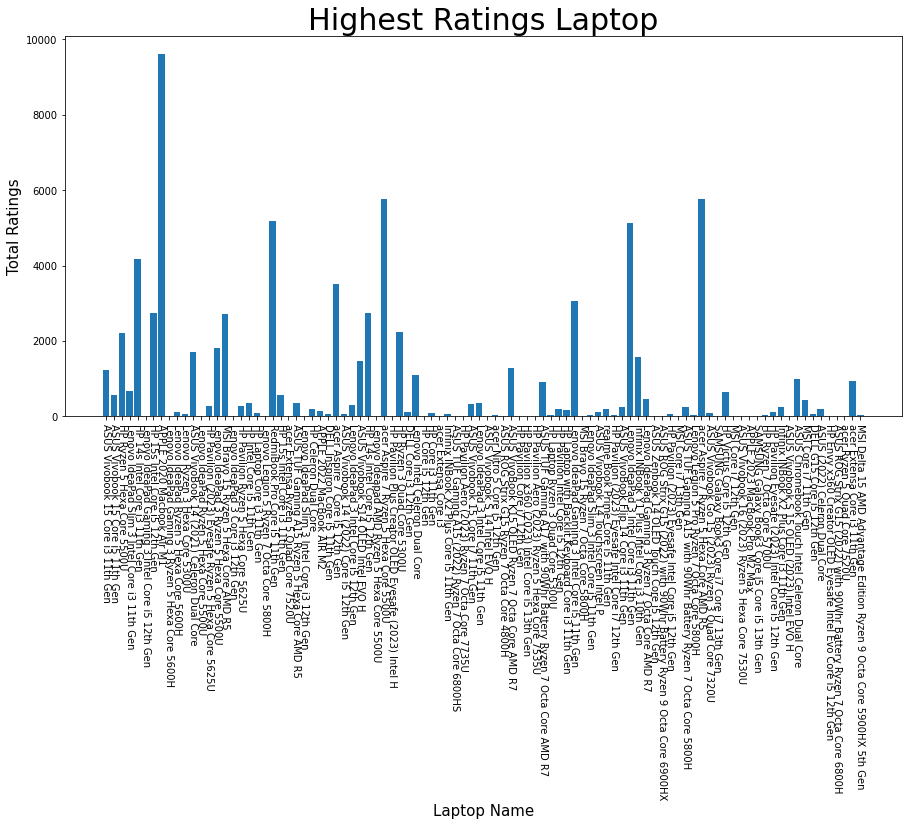

In [48]:
plt.figure(figsize=(15,7))
plt.bar(x=df['ProductName'],height=df['Ratings'])
plt.title('Highest Ratings Laptop', fontsize=30)
plt.xlabel('Laptop Name', fontsize=15)
plt.ylabel('Total Ratings', fontsize=15)
plt.xticks(rotation = 270)
plt.savefig('myfirstchart.jpg')
plt.show()

# Most Affordable Laptop

In [49]:
df.sort_values(by='CurrentPrice', ascending=True).head()

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
150,ASUS (2022) Celeron Dual Core,4.1,208,19,15990,30990,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,128 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
146,ASUS Chromebook Touch Intel Celeron Dual Core,4.0,988,159,19990,30990,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,39.62 cm (15.6 inch) Touchscreen Display,https://rukminim1.flixcart.com/image/312/312/l...
12,ASUS VivoBook 14 (2021) Celeron Dual Core,4.1,1705,202,21990,33990,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
32,HP Celeron Dual Core,4.0,207,17,25490,36965,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
99,Infinix INBook Y1 Plus Intel Core i3 10th Gen,4.2,1570,256,27990,44990,Intel Core i3 Processor (10th Gen),8 GB LPDDR4X RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...


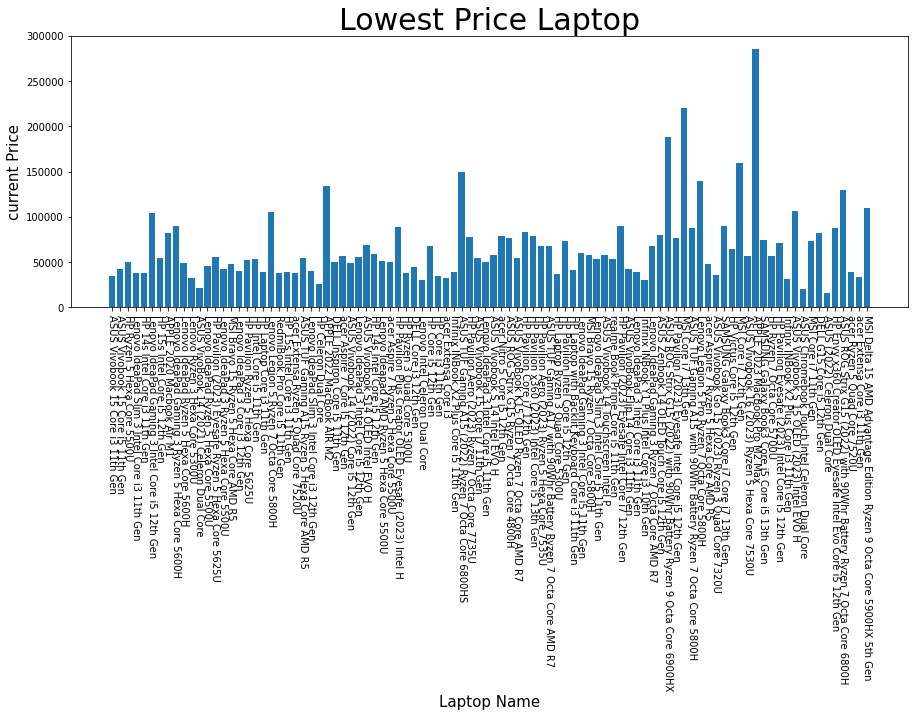

In [55]:
plt.figure(figsize=(15,5))
plt.bar(x=df['ProductName'],height=df['CurrentPrice'])
plt.title('Lowest Price Laptop', fontsize=30)
plt.xlabel('Laptop Name', fontsize=15)
plt.ylabel('current Price', fontsize=15)
plt.xticks(rotation = 270)
plt.savefig('myfirstchart.jpg')
plt.show()

In [51]:
smalldf = df[['ProductName','CurrentPrice','MRP']]
print(smalldf)

                                           ProductName  CurrentPrice     MRP
0                    ASUS Vivobook 15 Core i3 11th Gen         34990   50990
1                    ASUS Vivobook 15 Core i5 11th Gen         41990   69990
2                           HP Ryzen 5 Hexa Core 5500U         42900   54552
3         Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen         32990   59390
4                        HP 14s Intel Core i3 11th Gen         38490   49509
..                                                 ...           ...     ...
159             Lenovo IdeaPad Ryzen 5 Hexa Core 5600H         48990   86690
160                      acer Extensa Core i3 11th Gen         33990   43999
161  MSI Delta 15 AMD Advantage Edition Ryzen 9 Oct...        109990  188990
162                               MSI Core i7 12th Gen         99990  115990
163             Lenovo IdeaPad Ryzen 5 Hexa Core 5500U         45990   86290

[164 rows x 3 columns]


In [52]:
df[df['CurrentPrice']<45000]         #laptop price less than 45k

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
0,ASUS Vivobook 15 Core i3 11th Gen,4.2,1242,116,34990,50990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
1,ASUS Vivobook 15 Core i5 11th Gen,4.3,555,47,41990,69990,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
2,HP Ryzen 5 Hexa Core 5500U,4.3,1525,116,42900,54552,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
3,Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen,4.2,354,23,32990,59390,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
4,HP 14s Intel Core i3 11th Gen,4.3,4172,364,38490,49509,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
5,HP 14s Intel Core i3 11th Gen,4.2,2410,208,34990,47279,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
11,Lenovo Ryzen 3 Hexa Core 5300U,4.1,60,13,32990,58500,AMD Ryzen 3 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
12,ASUS VivoBook 14 (2021) Celeron Dual Core,4.1,1705,202,21990,33990,Intel Celeron Dual Core Processor,4 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
13,HP Ryzen 5 Hexa Core 5500U,4.3,2223,220,43990,55691,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
16,Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,4.3,1822,195,42943,68490,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...


In [53]:
df[(df['CurrentPrice']<45000) & (df['CurrentPrice']>35000)]

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
1,ASUS Vivobook 15 Core i5 11th Gen,4.3,555,47,41990,69990,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
2,HP Ryzen 5 Hexa Core 5500U,4.3,1525,116,42900,54552,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
4,HP 14s Intel Core i3 11th Gen,4.3,4172,364,38490,49509,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
13,HP Ryzen 5 Hexa Core 5500U,4.3,2223,220,43990,55691,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
16,Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,4.3,1822,195,42943,68490,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
18,Lenovo IdeaPad 3 Core i3 12th Gen,0.0,0,0,39990,66390,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
21,HP Laptop Core i3 11th Gen,4.3,91,9,38990,49025,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
23,RedmiBook Pro Core i5 11th Gen,4.1,5183,593,37990,59999,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
24,HP 15s Intel Core i3 11th Gen,4.3,579,54,38490,50585,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
27,acer Extensa Ryzen 5 Quad Core 7520U,4.5,24,9,37990,51999,Stylish & Portable Thin and Light Laptop,LPDDR5 RAM -faster & low power consuming,FHD 1080p screen with 250 Nits brightness,https://rukminim1.flixcart.com/image/312/312/x...
